In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, pickle
from scipy.integrate import simpson

In [2]:
from utils.latticeeasy import *
from utils.label_utils import label_blobs, get_labels
from utils.oscillons import *

In [3]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 9}) # These use the latex font for the pictures :)
# rc('font', **{'serif': ['Computer Modern']})  
rc('text', usetex=True)                       # These use the latex font for the pictures :)
                                                # It's just a pain to set up if you haven't yet.
plt.rcParams['axes.axisbelow'] = True
rc('axes', **{'titlesize': 9})
rc('image', cmap='gist_heat_r')

from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid

# Load data

In [4]:
output_dir = "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.5_50_250.804626/test1/smash_peak+0_peak+0_0.01c_v1"
# output_dir = "/media/yangelaxue/TRANSFER/Colliding_Oscillons/CE1"

data = LATTICEEASY(output_dir)
data.__dict__

{'output_dir': '/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.5_50_250.804626/test1/smash_peak+0_peak+0_0.01c_v1',
 'alpha': 0.5,
 'beta': 50.0,
 'phi_0': 0.118201,
 'dt_pr': 0.001,
 'dim': 3,
 'domain_width_pr': array([0.548993, 0.548993, 0.548993]),
 'domain_dimensions': (256, 256, 256),
 't': array([  4.99982 ,  10.000412,  15.002434,  24.99789 ,  34.992397,
         44.986904,  54.981411,  64.975914,  74.970421,  84.964928,
         94.959435, 104.953941, 114.948448, 124.942955, 129.955017,
        134.990417, 140.025818, 145.061218, 150.096619, 155.132019,
        160.167419, 165.20282 , 170.23822 , 175.273621, 180.309021,
        185.344421, 190.379822, 195.415222, 200.000458]),
 '_slice_tidx': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 'a': array([10.73867, 10.73867, 10.73867, 10.73867, 10.73867, 10.73867,
        10.73867, 10.73867, 10.73867, 10.73867, 10.73867, 10.7

In [5]:
from utils.gmon import get_mass



In [8]:
get_mass(0.05,25)

2.0325350113894476e-05

In [5]:
# output_main_dir = '_'.join('/'.join(output_dir.split('/')[:-1]).split('_')[:-1])
output_main_dir = "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.5_50"
data_main = LATTICEEASY(output_main_dir)

# t_pr = float(output_dir.split('/')[-2].split('_')[-1])
t_pr = 250.804626

timeslice, = np.where(data_main.t==t_pr)[0]

In [6]:
assert all(data_main.a[timeslice]==data.a)

a = data.a[0]
A, B, r, s = data.rescale_A, data.rescale_B, data.rescale_r, data.rescale_s
c_pr = 1/(a**(data.rescale_s+1))
c_pr

0.008671595406120412

In [7]:
key = "alpha_beta-{}_{}".format(round(data.alpha,2),int(data.beta))
speeds = "0.01c"

In [10]:
timeslices = [i for i in range(data.t.size)][:3:]
timeslices

[0, 1, 2]

# Look at oscillons

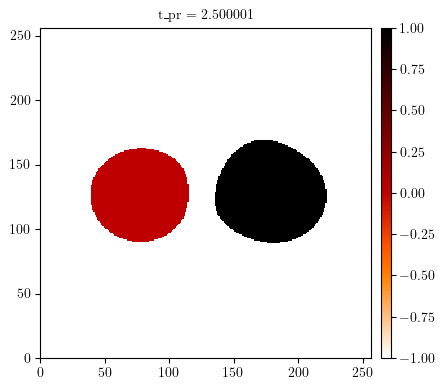

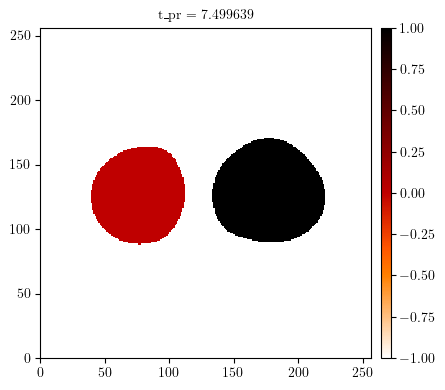

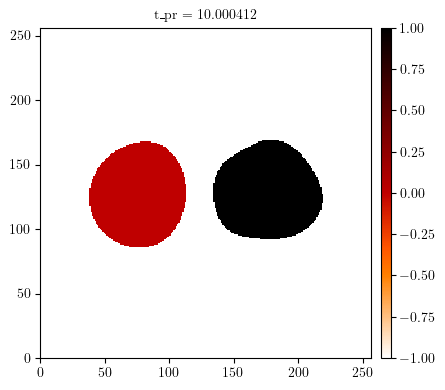

In [41]:
oscillons_fs = os.path.join(output_dir,"oscillons_dict_{}.p")

oscillons_gen = (pickle.load(open(oscillons_fs.format(data.t[timeslice]),'rb')) for timeslice in timeslices)

for timeslice, oscillons in zip(timeslices,oscillons_gen):
        
    fig, ax = plt.subplots(figsize=(6.3,4),tight_layout=True)
    
    mesh = ax.pcolormesh(oscillons[:,128].T)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size=.1, pad=0.1)
    cbar = fig.colorbar(mesh,cax=cax,)
    ax.set_aspect('equal')
    ax.set_title(f"t_pr = {data.t[timeslice]}")
    
    plt.show()

# Load masses

In [42]:
masses_t_dict = pickle.load(open(os.path.join(output_dir,"masses_t_dict.p"),'rb'))

In [43]:
for i, timeslice in enumerate(timeslices):
    print(i, masses_t_dict[data.t[timeslice]])

0 [0.01624805 0.01480218]
1 [0.01554206 0.01374121]
2 [0.01472813 0.01374989]


In [44]:
separated = [[i for i in range(len(timeslices))]]
separated_flat = [i for separated_t in separated for i in separated_t]

for separated_t in separated:
    print(masses_t_dict[data.t[timeslices][separated_t[0]]],masses_t_dict[data.t[timeslices][separated_t[-1]]])
    
separated_times = [[data.t[timeslices][t] for t in separated_t] for separated_t in separated]

merged = [[]]
count = 0
for t in range(len(timeslices)):
    if t not in separated_flat:
        merged[-1].append(t)
    else:
        if len(merged[-1])>0:
            merged.append([])

if len(merged[0])>0:
    for merged_t in merged:
        print(masses_t_dict[data.t[timeslices][merged_t[0]]],masses_t_dict[data.t[timeslices][merged_t[-1]]])
    
merged_times = [[data.t[timeslices][t] for t in merged_t] for merged_t in merged]
            
separated_times, merged_times

[0.01624805 0.01480218] [0.01472813 0.01374989]


([[2.500001, 7.499639, 10.000412]], [[]])

In [45]:
mass_T = []
mass_1 = []
mass_2 = []

for separated_t in separated:
    
    mass_1.append([])
    mass_2.append([])
    
    for timeslice in separated_t:
        masses = masses_t_dict[data.t[timeslices][timeslice]]
        
        mass_1[-1].append(masses[0])
        mass_2[-1].append(masses[1])

for timeslice in timeslices:
    
    masses = masses_t_dict[data.t[timeslice]]
    mass_T.append(sum(masses))
    
mass_T = np.array(mass_T)

In [46]:
mass_T

array([0.03105024, 0.02928327, 0.02847803])

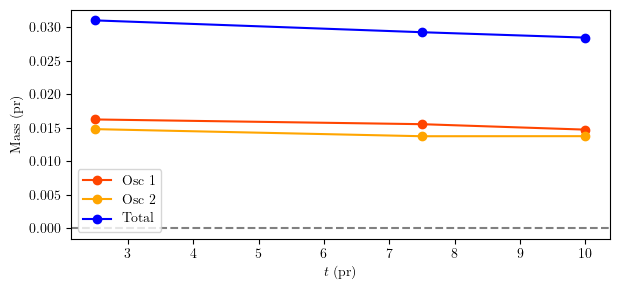

In [47]:
c_1 = "orangered"
c_2 = "orange"
c_T = "b"
label_1 = "Osc 1"
label_2 = "Osc 2"
label_T = "Total"

fig, ax = plt.subplots(1,1,figsize=(6.3,3),tight_layout=True)

for i,separated_time in enumerate(separated_times):
    
    if i==0:
        ax.plot(separated_time, mass_1[i], c=c_1, marker='o', label=label_1)
        ax.plot(separated_time, mass_2[i], c=c_2, marker='o', label=label_2)
    else:
        ax.plot(separated_time, mass_1[i], c=c_1, marker='o')
        ax.plot(separated_time, mass_2[i], c=c_2, marker='o')

ax.plot(data.t[timeslices], mass_T, c='b', marker='o', label=label_T)

ax.legend()
ax.set_xlabel(r"$t$ (pr)")
ax.set_ylabel(r"Mass (pr)")
# ax.set_ylim(-0.001,0.015)
ax.axhline(0,c='gray',ls='--')

plt.show()

# Load COMS, calculate velocity

In [48]:
coms_t_dict = pickle.load(open(os.path.join(output_dir,"coms_t_dict.p"),'rb'))

In [49]:
coms_T = []
coms_1 = []
coms_2 = []

for separated_t in separated:
    
    coms_1.append([])
    coms_2.append([])
    
    for timeslice in separated_t:
        coms = coms_t_dict[data.t[timeslices][timeslice]].copy()
        
        for i, com in enumerate(coms):
            coms[i] = com-data.domain_width_pr[0]/2
        
        coms_1[-1].append(coms[0])
        coms_2[-1].append(coms[1])
        
for merged_t in merged:
    
    coms_T.append([])

    for timeslice in merged_t:
        
        coms = coms_t_dict[data.t[timeslices][timeslice]].copy()
        for i, com in enumerate(coms):
            coms[i] = com-data.domain_width_pr[0]/2
        masses = masses_t_dict[data.t[timeslices][timeslice]]
        
        if len(masses)==1:
            coms_T[-1].append(coms[0])
        else:
            coms_T[-1].append(coms[np.where(masses==max(masses))[0][0]])
            
for i, (com_1, com_2, com_T) in enumerate(zip(coms_1,coms_2, coms_T)):
    coms_1[i] = np.array(com_1)
    coms_2[i] = np.array(com_2)
    coms_T[i] = np.array(com_T)

In [50]:
velocity_1 = []
velocity_2 = []
velocity_T = []

for i, separated_time in enumerate(separated_times):
    
    velocity_1.append(np.diff(coms_1[i],axis=0)/np.tile(np.diff(separated_time),(3,1)).T)
    velocity_2.append(np.diff(coms_2[i],axis=0)/np.tile(np.diff(separated_time),(3,1)).T)
    
# for i, merged_time in enumerate(merged_times):
    
#     velocity_T.append(np.diff(coms_T[i],axis=0)/np.tile(np.diff(merged_time),(3,1)).T)

Text(0.5, -0.03, 'f')

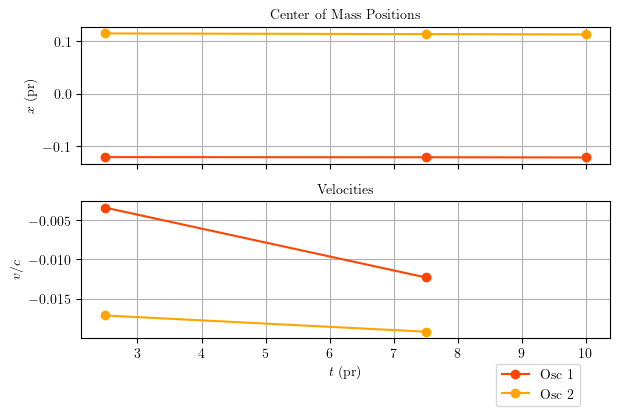

In [51]:
fig, axes = plt.subplots(2,1,figsize=(6.3,4),tight_layout=True,sharex=True)

for i, separated_time in enumerate(separated_times):
    axes[0].plot(separated_time,coms_1[i][:,0], marker='o', c=c_1, label=label_1)
    axes[0].plot(separated_time,coms_2[i][:,0], marker='o', c=c_2, label=label_2)
    
    axes[1].plot(separated_time[:-1],velocity_1[i][:,0]/c_pr, marker='o', c=c_1)
    axes[1].plot(separated_time[:-1],velocity_2[i][:,0]/c_pr, marker='o', c=c_2)

# for i, merged_time in enumerate(merged_times):
#     axes[0].plot(merged_time, coms_T[i][:,0], c='b', marker='o', label=label_T)
    
#     axes[1].plot(merged_time[:-1], velocity_T[i][:,0], c='b', marker='o')
    
axes[0].set_title("Center of Mass Positions")
axes[0].set_ylabel(r"$x$ (pr)")
axes[1].set_title("Velocities")
axes[1].set_ylabel(r"$v/c$")
axes[1].set_xlabel(r"$t$ (pr)")
# axes[1].set_ylim(-0.027,0.027)

for ax in axes:
#     ax.legend()
    ax.grid()

fig.legend(loc=(0.8,0.03))
fig.text(.5,-0.03,'f',c='w')

In [52]:
velocity_1[i][:,0]/c_pr, velocity_2[i][:,0]/c_pr

(array([-0.00342834, -0.0122996 ]), array([-0.01714497, -0.01920666]))

# Old stuff

In [ ]:
# plot_timeslices = [i for i in range(20,26)]
# plot_timeslices = [4,5,6,7,8,9]
plot_timeslices = timeslices
data.t[plot_timeslices]

In [ ]:
idxes = []
for timeslice in plot_timeslices:
    idxes.append(np.where(timeslice==np.array(timeslices))[0][0])

In [ ]:
data.t[timeslices][idxes]

In [ ]:
dx_pr = (data.domain_width_pr[1]/data.domain_dimensions[1])

In [ ]:
# if os.path.exists(os.path.join(save_dir,"Eden projections y.p")):
if 0:
    print("Loading projections")
    Edens_max_y_t,Edens_proj_y_t,vmin_y,vmax_y = pickle.load(open(os.path.join(output_dir,"Eden projections y.p"),'rb'))
    Edens_max_z_t,Edens_proj_z_t,vmin_z,vmax_z = pickle.load(open(os.path.join(output_dir,"Eden projections z.p"),'rb'))
else:
    
    Edens_t = (data.get_Edens_pr(timeslice) for timeslice in timeslices)
    
    print("Saving projections")
    Edens_max_y_t = []
#     Edens_max_z_t = []
    Edens_proj_y_t = []
#     Edens_proj_z_t = []

    vmin_y, vmax_y = 0, 0
#     vmin_z, vmax_z = 0, 0

#     for i, Edens in enumerate(np.array(Edens_t)[idxes]):
    for i, Edens in enumerate(Edens_t):
#     for i, Edens in enumerate((data.get_Edens_pr(timeslice) for timeslice in plot_timeslices)):

        print(i)

        Edens_max_y = Edens.max(axis=1)
#         Edens_max_z = Edens.max(axis=2)
        Edens_max_y_t.append(Edens_max_y)
#         Edens_max_z_t.append(Edens_max_z)

        Edens_proj_y = simpson(Edens, dx=dx_pr, axis=1)
#         Edens_proj_z = simpson(Edens, dx=dx_pr, axis=2)
        Edens_proj_y_t.append(Edens_proj_y)
#         Edens_proj_z_t.append(Edens_proj_z)

        vmin_y = Edens_proj_y.min() if vmin_y>Edens_proj_y.min() else vmin_y
        vmax_y = Edens_proj_y.max() if vmax_y<Edens_proj_y.max() else vmax_y

#         vmin_z = Edens_proj_z.min() if vmin_z>Edens_proj_z.min() else vmin_z
#         vmax_z = Edens_proj_z.max() if vmax_z<Edens_proj_z.max() else vmax_z

    pickle.dump([Edens_max_y_t,Edens_proj_y_t,vmin_y,vmax_y],open(os.path.join(save_dir,"Eden projections y.p"),'wb'))
#     pickle.dump([Edens_max_z_t,Edens_proj_z_t,vmin_z,vmax_z],open(os.path.join(output_dir,"Eden projections z.p"),'wb'))

In [ ]:
# if os.path.exists(os.path.join(output_dir,"phi projections y.p")):
if 0:
    print("Loading projections")
    phi_proj_y_t,phi_vmin_y,phi_vmax_y = pickle.load(open(os.path.join(output_dir,"phi projections y.p"),'rb'))
    phi_proj_z_t,phi_vmin_z,phi_vmax_z = pickle.load(open(os.path.join(output_dir,"phi projections z.p"),'rb'))
else:
    print("Saving projections")

    phi_gen = (load_phi(output_dir,data.domain_dimensions,timeslice) for timeslice in plot_timeslices)

    phi_proj_y_t = []
#     phi_proj_z_t = []

    phi_vmin_y, phi_vmax_y = 0, 0
#     phi_vmin_z, phi_vmax_z = 0, 0

    for i, phi in enumerate(phi_gen):

        print(i)

        phi_proj_y = simpson(phi, dx=dx_pr, axis=1)
#         phi_proj_z = simpson(phi, dx=dx_pr, axis=2)
        phi_proj_y_t.append(phi_proj_y)
#         phi_proj_z_t.append(phi_proj_z)

        phi_vmin_y = phi_proj_y.min() if phi_vmin_y>phi_proj_y.min() else phi_vmin_y
        phi_vmax_y = phi_proj_y.max() if phi_vmax_y<phi_proj_y.max() else phi_vmax_y

#         phi_vmin_z = phi_proj_z.min() if phi_vmin_z>phi_proj_z.min() else phi_vmin_z
#         phi_vmax_z = phi_proj_z.max() if phi_vmax_z<phi_proj_z.max() else phi_vmax_z
        
    pickle.dump([phi_proj_y_t,phi_vmin_y,phi_vmax_y],open(os.path.join(save_dir,"phi projections y.p"),'wb'))
#     pickle.dump([phi_proj_z_t,phi_vmin_z,phi_vmax_z],open(os.path.join(save_dir,"phi projections z.p"),'wb'))

# pcolormesh plots

In [ ]:
L = data.domain_width_pr[0]

In [1]:
x,y,z = (np.linspace(0,width_pr,dim) for width_pr,dim in zip(data.domain_width_pr,data.domain_dimensions))

N_times = len(plot_timeslices)

fig = plt.figure(figsize=(6.3,7.5))

grid = ImageGrid(fig, 211,
                nrows_ncols = (2,3),
                axes_pad = .1,
                cbar_location = "right",
                cbar_mode="single",
                cbar_size=.1,
                cbar_pad=0.1,
                )

for j, grd in enumerate(grid):
    mesh = grd.pcolormesh(x,y,phi_proj_y_t[j].T,vmin=phi_vmin_y,vmax=phi_vmax_y)
    cbar = fig.colorbar(mesh, cax=grid.cbar_axes[j//3])
    cbar.set_label(r"$\textrm{Proj}_{y}(\phi_{\textrm{pr}})$")
    
    if j%3>0:
        grd.get_yaxis().set_visible(False)
    if j<3:
        grd.get_xaxis().set_visible(False)
    elif j%3==1:
        grd.set_xlabel(r'$x$ (pr)')
    
    grd.text(L/16,L*3/4,r"$t_{\textrm{pr}}$ = "+f"{data.t[plot_timeslices[j]]}",c='w')
    grd.set_aspect('equal')
    grd.set_ylim(L/8,L*7/8)
    
grid = ImageGrid(fig, 212,
                nrows_ncols = (2,3),
                axes_pad = .1,
                cbar_location = "right",
                cbar_mode="single",
                cbar_size=.1,
                cbar_pad=0.1,
                )

for j, grd in enumerate(grid):
    mesh = grd.pcolormesh(x,y,Edens_proj_y_t[j].T,vmin=vmin_y,vmax=vmax_y)
    grd.contour(x,y,Edens_max_y_t[j].T/Edens_mean,levels=[1],colors='b',linewidths=1., linestyles=':')
    cbar = fig.colorbar(mesh, cax=grid.cbar_axes[j//3])
    cbar.set_label(r"$\textrm{Proj}_{y}(\rho_{\textrm{pr}})$")
    
    if j%3>0:
        grd.get_yaxis().set_visible(False)
    if j<3:
        grd.get_xaxis().set_visible(False)
    elif j%3==1:
        grd.set_xlabel(r'$x$ (pr)')
    
    grd.text(L/16,L*3/4,r"$t_{\textrm{pr}}$ = "+f"{data.t[plot_timeslices[j]]}",c='k')
    grd.set_aspect('equal')
    grd.set_ylim(L/8,L*7/8)

# fig.text(0.47,0.06,r"$x$ (pr)") 
# fig.text(0.47,0.5,r"$x$ (pr)")
fig.text(0.5,.88,r"Inflaton Field",ha='center')
fig.text(0.5,0.46,r"Energy Density",ha='center')
fig.text(0.04,0.25,r"$z$ (pr)",rotation=90)
fig.text(0.04,0.7,r"$z$ (pr)",rotation=90)

# plt.savefig(os.path.join(save_dir,f"test Collide oscillons grid {key}_{speeds} y.png"), bbox_inches='tight', facecolor='w', dpi=400)
plt.show()

NameError: name 'data' is not defined

In [ ]:
x,y,z = (np.linspace(0,width_pr,dim) for width_pr,dim in zip(data.domain_width_pr,data.domain_dimensions))
x_trim = 1

N_times = len(timeslices)

fig = plt.figure(figsize=(9.7,6),tight_layout=True)

grid = ImageGrid(fig, 111,
                nrows_ncols = (3,N_times),
                axes_pad = .1,
                cbar_location = "right",
                cbar_mode="edge",
                cbar_size=.1,
                cbar_pad=0.1,
                )

for j, grd in enumerate(grid):
    
    i = j%N_times
    f = j//N_times
    
    if f==0:
        grd.set_title(fr"$t$ (pr) = {data.t[timeslices[i]]}")
        mesh = grd.pcolormesh(x[:-x_trim*2],z[:-x_trim*2],phi_proj_y_t[i].T[x_trim:-x_trim,x_trim:-x_trim],vmin=phi_vmin_y,vmax=phi_vmax_y)
    elif f==1:
        mesh = grd.pcolormesh(x[:-x_trim*2],z[:-x_trim*2],phip_proj_y_t[i].T[x_trim:-x_trim,x_trim:-x_trim],vmin=phip_vmin_y,vmax=phip_vmax_y)
    else:
        mesh = grd.pcolormesh(x[:-x_trim*2],z[:-x_trim*2],Edens_proj_y_t[i].T[x_trim:-x_trim,x_trim:-x_trim],vmin=vmin_y,vmax=vmax_y)
        grd.contour(x[:-x_trim*2],z[:-x_trim*2],Edens_max_y_t[i].T[x_trim:-x_trim,x_trim:-x_trim]/Edens_mean,levels=[1],colors='b',linewidths=1., linestyles=':')

    grd.set_aspect('equal')
    
    if not i==0:
        grd.get_yaxis().set_visible(False)
    if not f==2:
        grd.get_xaxis().set_visible(False)
    

    if i==N_times-1:
        cbar = fig.colorbar(mesh, cax=grid.cbar_axes[f])
        if f==0:
            cbar.set_label(r"$\textrm{Proj}_{y}(\phi_{\textrm{pr}})$", rotation=270, va='bottom')
        elif f==1:
            cbar.set_label(r"$\textrm{Proj}_{y}(\phi_{\textrm{pr}}')$", rotation=270, va='bottom')
        else:
            cbar.set_label(r"$\textrm{Proj}_{y}(\rho_{\textrm{pr}})$", rotation=270, va='bottom')

            
fig.text(0.45,0,r"$x$ (pr)")            
fig.text(-.02,0.5,r"$z$ (pr)",rotation=90)

# plt.savefig(os.path.join(save_dir,f"Collide oscillons grid {key}_{speeds} y.png"), bbox_inches='tight', facecolor='w', dpi=400)
plt.show()

In [ ]:
x,y,z = (np.linspace(0,width_pr,dim) for width_pr,dim in zip(data.domain_width_pr,data.domain_dimensions))
x_trim = 1

N_times = len(timeslices)

fig = plt.figure(figsize=(9.7,6),tight_layout=True)

grid = ImageGrid(fig, 111,
                nrows_ncols = (3,N_times),
                axes_pad = .1,
                cbar_location = "right",
                cbar_mode="edge",
                cbar_size=.1,
                cbar_pad=0.1,
                )

for j, grd in enumerate(grid):
    
    i = j%N_times
    f = j//N_times
    
    if f==0:
        grd.set_title(fr"$t$ (pr) = {data.t[timeslices[i]]}")
        mesh = grd.pcolormesh(x[:-x_trim*2],z[:-x_trim*2],phi_proj_z_t[i].T[x_trim:-x_trim,x_trim:-x_trim],vmin=phi_vmin_z,vmax=phi_vmax_z)
    elif f==1:
        mesh = grd.pcolormesh(x[:-x_trim*2],z[:-x_trim*2],phip_proj_z_t[i].T[x_trim:-x_trim,x_trim:-x_trim],vmin=phip_vmin_z,vmax=phip_vmax_z)
    else:
        mesh = grd.pcolormesh(x[:-x_trim*2],z[:-x_trim*2],Edens_proj_z_t[i].T[x_trim:-x_trim,x_trim:-x_trim],vmin=vmin_z,vmax=vmax_z)
        grd.contour(x[:-x_trim*2],z[:-x_trim*2],Edens_max_z_t[i].T[x_trim:-x_trim,x_trim:-x_trim]/Edens_mean,levels=[1],colors='b',linewidths=1., linestyles=':')
    
    grd.set_aspect('equal')
    
    if not i==0:
        grd.get_yaxis().set_visible(False)
    if not f==2:
        grd.get_xaxis().set_visible(False)
    
    if i==N_times-1:
        cbar = fig.colorbar(mesh, cax=grid.cbar_axes[f])
        if f==0:
            cbar.set_label(r"$\textrm{Proj}_{z}(\phi_{\textrm{pr}})$", rotation=270, va='bottom')
        elif f==1:
            cbar.set_label(r"$\textrm{Proj}_{z}(\phi_{\textrm{pr}}')$", rotation=270, va='bottom')
        else:
            cbar.set_label(r"$\textrm{Proj}_{z}(\rho_{\textrm{pr}})$", rotation=270, va='bottom')
            
fig.text(0.45,0,r"$x$ (pr)")            
fig.text(-.02,0.5,r"$z$ (pr)",rotation=90)

plt.savefig(os.path.join(save_dir,f"Collide oscillons grid {key}_{speeds} z.png"), bbox_inches='tight', facecolor='w', dpi=400)
plt.show()

# some profile plots

In [ ]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('gist_heat_r')

In [ ]:
Edens_profile_t = []

for i, Edens in enumerate(Edens_t):
    
    Edens_profile_t.append(Edens[:,128,128])

Edens_profile_t = np.array(Edens_profile_t)

In [ ]:
n_colors = len(Edens_profile_t)
dcolors = 1/(n_colors)

# n_colors
for i,Edens_profile in enumerate(Edens_profile_t):
    plt.plot(x,Edens_profile,color=cmap((i+1)*dcolors))

In [ ]:
x,y,z = (np.linspace(0,width_pr,dim) for width_pr,dim in zip(data.domain_width_pr,data.domain_dimensions))
x_trim = 15

N_times = len(timeslices)

fig = plt.figure(figsize=(9.7,4),tight_layout=True)

grid = ImageGrid(fig, 111,
                nrows_ncols = (2,N_times),
                axes_pad = .1,
                cbar_location = "right",
                cbar_mode="edge",
                cbar_size=.1,
                cbar_pad=0.1,
                )

for j, grd in enumerate(grid):
    
    i = j%N_times
    f = j//N_times
    
    if f==0:
        grd.set_title(fr"$t$ (pr) = {data.t[timeslices[i]]}")
        grd.set_aspect(1/12)
        grd.plot(x[:-x_trim*2],phi_proj_y_t[i][128][x_trim:-x_trim])
        
#         mesh = grd.pcolormesh(x[:-x_trim*2],z[:-x_trim*2],phi_proj_y_t[i].T[x_trim:-x_trim,x_trim:-x_trim],vmin=phi_vmin_y,vmax=phi_vmax_y)
    elif f==10:
        mesh = grd.pcolormesh(x[:-x_trim*2],z[:-x_trim*2],phip_proj_y_t[i].T[x_trim:-x_trim,x_trim:-x_trim],vmin=phip_vmin_y,vmax=phip_vmax_y)
    else:
        mesh = grd.pcolormesh(x[:-x_trim*2],z[:-x_trim*2],Edens_proj_y_t[i].T[x_trim:-x_trim,x_trim:-x_trim],vmin=vmin_y,vmax=vmax_y)
        grd.contour(x[:-x_trim*2],z[:-x_trim*2],Edens_max_y_t[i].T[x_trim:-x_trim,x_trim:-x_trim]/Edens_mean,levels=[1],colors='b',linewidths=1., linestyles=':')
        grd.set_aspect('equal')
    
    if not i==0:
        grd.get_yaxis().set_visible(False)
    if not f==1:
        grd.get_xaxis().set_visible(False)
    

    if i==N_times-1:
        
        if f==0:
#             cbar = fig.colorbar(mesh, cax=grid.cbar_axes[f])
#             cbar.set_label(r"$\textrm{Proj}_{y}(\phi_{\textrm{pr}})$", rotation=270, va='bottom')
            continue
        elif f==10:
            cbar = fig.colorbar(mesh, cax=grid.cbar_axes[f])
            cbar.set_label(r"$\textrm{Proj}_{y}(\phi_{\textrm{pr}}')$", rotation=270, va='bottom')
        else:
            cbar = fig.colorbar(mesh, cax=grid.cbar_axes[f])
            cbar.set_label(r"$\textrm{Proj}_{y}(\rho_{\textrm{pr}})$", rotation=270, va='bottom')

            
fig.text(0.45,-.02,r"$x$ (pr)")            
fig.text(-.02,0.5,r"$z$ (pr)",rotation=90)

# plt.savefig(os.path.join(save_dir,f"Collide oscillons grid {key}_{speeds} y.png"), bbox_inches='tight', facecolor='w', dpi=400)
plt.show()